<a href="https://colab.research.google.com/github/JoshOmondi/deep_learning/blob/master/scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle (5).json to kaggle (5).json


{'kaggle (5).json': b'{"username":"joshua10542","key":"3934055eef66aa625ae0554f874a14ee"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp "kaggle (5).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets list -s fer2013


ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
deadskull7/fer2013                                            fer2013                                             101279992  2018-05-26 12:18:24.933000          57105        536  0.29411766       
nicolejyt/facialexpressionrecognition                         FER2013                                             101279992  2019-04-02 18:29:26.050000          10968         57  0.3529412        
astraszab/facial-expression-dataset-image-folders-fer2013     Facial expression dataset image folders (fer2013)    68268497  2020-04-14 08:15:32.013000           4912         66  0.5625           
subhaditya/fer2

In [4]:
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip -d fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.07GB/s]


In [7]:
import os
import shutil

classes_to_extract = ['fear', 'disgust', 'surprise']
source_dir = '/content/fer2013/train'
target_dir = '/content/selected_classes'

# Create target directories
for cls in classes_to_extract:
    os.makedirs(os.path.join(target_dir, cls), exist_ok=True)


In [8]:
from PIL import Image

def is_image_valid(filepath):
    try:
        with Image.open(filepath) as img:
            img.verify()
        return True
    except:
        return False

for cls in classes_to_extract:
    src_path = os.path.join(source_dir, cls)
    tgt_path = os.path.join(target_dir, cls)

    for filename in os.listdir(src_path):
        file_path = os.path.join(src_path, filename)
        if is_image_valid(file_path):
            shutil.copy(file_path, tgt_path)


In [9]:
!zip -r selected_classes.zip /content/selected_classes


Streaming output truncated to the last 5000 lines.
  adding: content/selected_classes/fear/Training_76861998.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_91466839.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_94762205.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_42536701.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_30419445.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_98882902.jpg (deflated 0%)
  adding: content/selected_classes/fear/Training_82666560.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_36393037.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_99874738.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_63617586.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_32778118.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_1243725.jpg (stored 0%)
  adding: content/selected_classes/fear/Training_41674916.jp

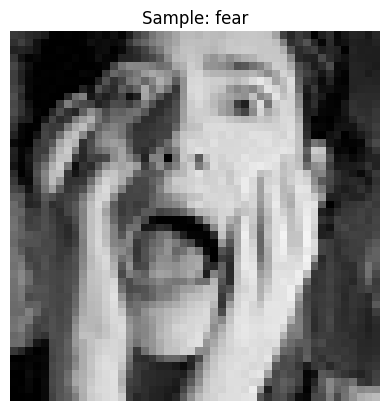

In [11]:
import matplotlib.pyplot as plt
import cv2

sample_path = os.path.join(target_dir, 'fear')  # test one class
sample_img = cv2.imread(os.path.join(sample_path, os.listdir(sample_path)[0]))
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Sample: fear")
plt.show()


In [12]:
from google.colab import files
files.download("selected_classes.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import os

base_path = "/content/selected_classes"

for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        num_images = len([
            file for file in os.listdir(class_path)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
        ])
        print(f"{class_name}: {num_images} images")


fearful: 0 images
disgust: 436 images
.ipynb_checkpoints: 0 images
fear: 4097 images
surprise: 3171 images


In [14]:
!pip install opencv-python-headless


In [16]:
import os
import cv2
import shutil

source_dir = "/content/selected_classes"
target_dir = "/content/classes"
target_count = 400

# Create the target directory
os.makedirs(target_dir, exist_ok=True)

for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    output_path = os.path.join(target_dir, class_name)
    os.makedirs(output_path, exist_ok=True)

    count = 0
    for img_file in sorted(os.listdir(class_path)):
        if img_file.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
            img_path = os.path.join(class_path, img_file)
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            if img is not None:
                # Optional: simple quality check (size, not blurred, etc.)
                if img.shape[0] >= 48 and img.shape[1] >= 48:  # minimum size check
                    shutil.copy(img_path, os.path.join(output_path, img_file))
                    count += 1
            if count >= target_count:
                break

    print(f"{class_name}: selected {count} images")


disgust: selected 400 images
.ipynb_checkpoints: selected 0 images
fear: selected 400 images
surprise: selected 400 images


In [17]:
!zip -r classes.zip /content/classes


  adding: content/classes/ (stored 0%)
  adding: content/classes/disgust/ (stored 0%)
  adding: content/classes/disgust/Training_75853240.jpg (stored 0%)
  adding: content/classes/disgust/Training_79131956.jpg (stored 0%)
  adding: content/classes/disgust/Training_40939984.jpg (stored 0%)
  adding: content/classes/disgust/Training_19213548.jpg (stored 0%)
  adding: content/classes/disgust/Training_16806541.jpg (stored 0%)
  adding: content/classes/disgust/Training_40778169.jpg (stored 0%)
  adding: content/classes/disgust/Training_3310799.jpg (stored 0%)
  adding: content/classes/disgust/Training_58836036.jpg (stored 0%)
  adding: content/classes/disgust/Training_36543482.jpg (stored 0%)
  adding: content/classes/disgust/Training_76279247.jpg (stored 0%)
  adding: content/classes/disgust/Training_62572176.jpg (stored 0%)
  adding: content/classes/disgust/Training_52049977.jpg (stored 0%)
  adding: content/classes/disgust/Training_43960078.jpg (stored 0%)
  adding: content/classes/disgu

In [18]:
from google.colab import files
files.download("classes.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

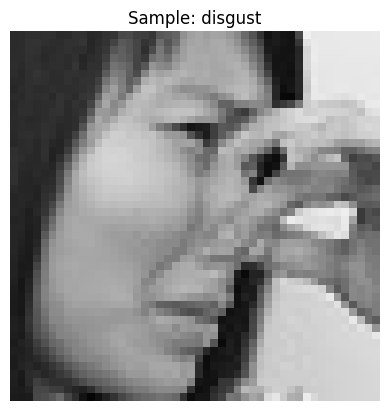

In [20]:
import matplotlib.pyplot as plt
import cv2

sample_path = os.path.join(target_dir, 'disgust')  # test one class
sample_img = cv2.imread(os.path.join(sample_path, os.listdir(sample_path)[0]))
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Sample: disgust")
plt.show()
